In [26]:
from qiskit_ibm_runtime import Estimator
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from src.observable import create_parametrized_hermitian_matrix, hermitian_to_sparsepauliop, random_complex_vector, assign_parameters_to_matrix
from src.run_estimator import run_estimator

# Create the parametrized matrix

In [27]:

n_qubits = 3

In [28]:
# Create a parametrized observable
N = 2**n_qubits
matrix = create_parametrized_hermitian_matrix(N)


# Create a circuit

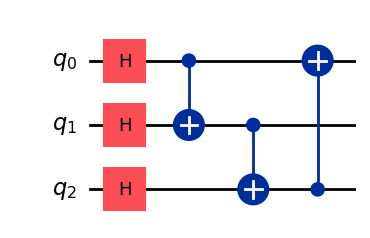

In [29]:
# Create a circuit of all H's followed by a CNOT circular chain
qc = QuantumCircuit(n_qubits)
qc.h(range(n_qubits))
for i in range(n_qubits):
    qc.cx(i, (i + 1) % n_qubits)
    
qc.draw('mpl', fold=-1)


# Create a set of random parameters

In [30]:
size_set_params = 50
n_params = N**2
range_real = (-1, 1)
range_imag = (-1, 1)

params = []
for _ in range(size_set_params):
    params.append(random_complex_vector(n_params, seed=0, range_real=range_real, range_imag=range_imag))


# Create the observables

In [31]:
def create_operator_from_params(param_matrix, params, n_qubits):
    assigned_matrix = assign_parameters_to_matrix(param_matrix, params)
    sparse_pauli_op = hermitian_to_sparsepauliop(assigned_matrix, n_qubits)
    return sparse_pauli_op

In [32]:
observables = [create_operator_from_params(matrix, p, n_qubits) for p in params]

# Run on Estimator

In [33]:
shots = 20_000
pubs = []
for obs in observables:
    pubs.append((qc, obs))

result = run_estimator(pubs, shots)

In [34]:
# Get the results
evs = []
for i, r in enumerate(result):
    evs.append(r.data.evs.tolist())

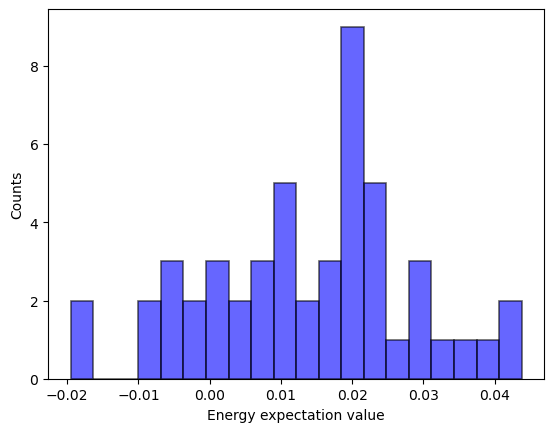

In [35]:
# plot an histogram of the results
import matplotlib.pyplot as plt
import numpy as np

plt.hist(evs, bins=20, alpha=0.6, color='b', edgecolor='black', linewidth=1.2)
plt.xlabel('Energy expectation value')
plt.ylabel('Counts')
plt.show()